## Model Creation: Boston House Pricing Dataset

**Importing necessary Libraries**

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Loading the dataset**

In [5]:
from sklearn.datasets import load_boston

In [6]:
#loading the data
boston_data = load_boston()

In [7]:
#checking the dataset
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [8]:
#description of the dataset
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#feature names:
features = boston_data['feature_names']
print(features)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Preparing the dataset**

In [10]:
data_df = pd.DataFrame(boston_data['data'], columns=features)

In [11]:
data_df['price'] = boston_data.target

In [12]:
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
#info:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
#statistics of the data:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# checking for missing values:
data_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

**Exploring the data**

In [16]:
##checking for multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif = []
for i in range(data_df.shape[1]-1):
    vif.append(variance_inflation_factor(data_df.iloc[:,:-1],i))
    

In [18]:
pd.DataFrame({'VIF': vif}, index=data_df.columns[:-1])

,VIF
CRIM,2.100373
ZN,2.844013
INDUS,14.485758
CHAS,1.152952
NOX,73.894947
RM,77.948283
AGE,21.386850
DIS,14.699652
RAD,15.167725
TAX,61.227274


There are features for which the VIF > 5 but lets first check the correlation matrix.

In [19]:
#correlation matrix
data_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

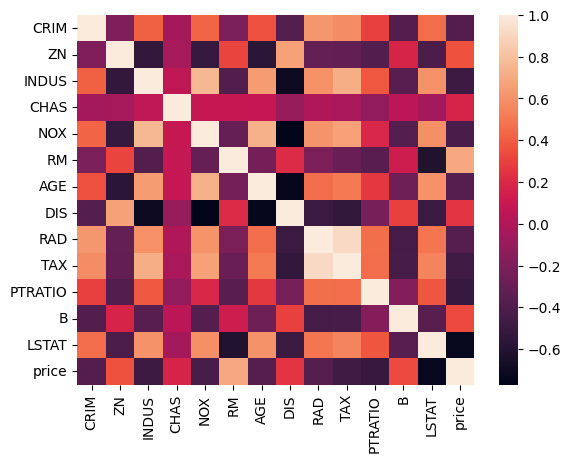

In [20]:
sns.heatmap(data_df.corr(), annot = False)

Checking the relationship of output to some of the input features

<AxesSubplot: xlabel='CRIM', ylabel='price'>

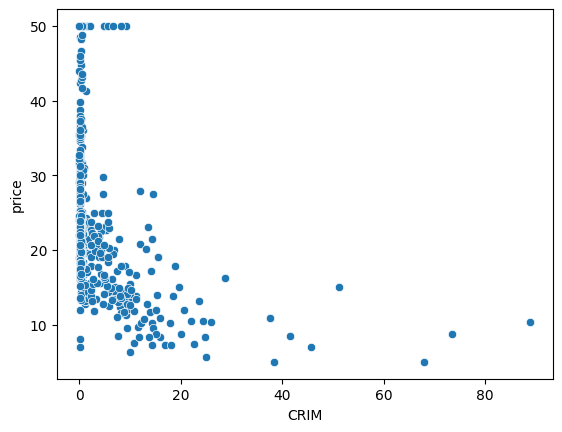

In [21]:
sns.scatterplot(x = 'CRIM', y = 'price', data=data_df)

It looks like the crime rate is inversely proportional to the price, as it should be.

<AxesSubplot: xlabel='RM', ylabel='price'>

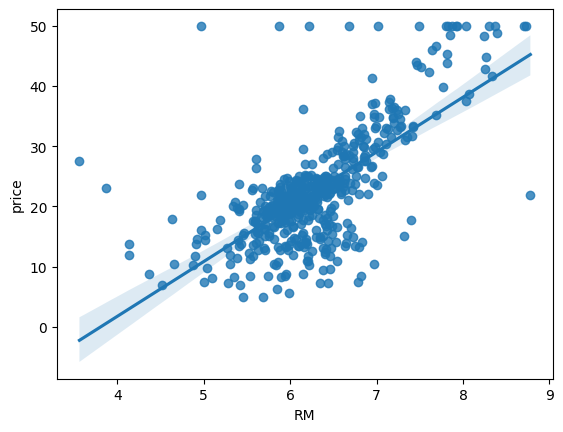

In [22]:
sns.regplot(x = 'RM', y = 'price', data = data_df)

Here it looks like as the number of rooms increases, the price increases.

In [23]:
#deviding the data into indep and dep features
X = data_df.iloc[:,:-1]
y = data_df.iloc[:,-1]

In [24]:
#train test split:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

In [25]:
#standardizing the dataset:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

**Model Training**

In [27]:
#import the model
from sklearn.linear_model import LinearRegression as LR

In [28]:
reg = LR()

In [29]:
reg.fit(X_train,y_train)

LinearRegression()

In [30]:
#printing the co-efficients:
print(reg.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [31]:
#printing the intercept:
print(reg.intercept_)

23.01581920903956


In [32]:
#parameters of the model:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [33]:
#predicting:
y_pred = reg.predict(X_test)

<AxesSubplot: xlabel='price'>

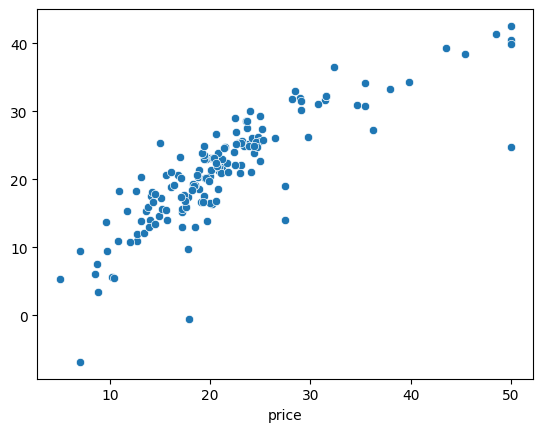

In [34]:
#plot of the prediction:
sns.scatterplot(x = y_test, y = y_pred)

In [35]:
#residuals:
residual = y_test - y_pred

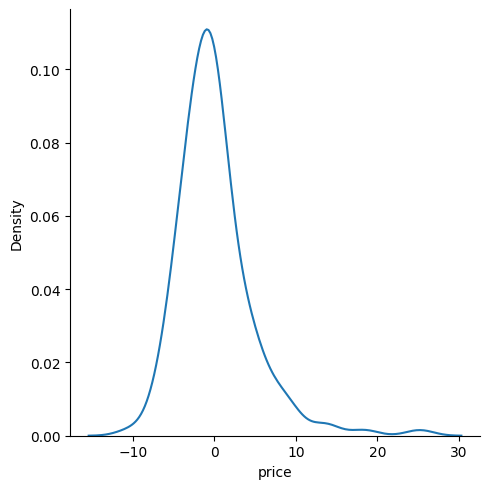

In [36]:
##plotting the residuals:
sns.displot(residual, kind='kde')

This follows the normalcy of the residulas.

<AxesSubplot: ylabel='price'>

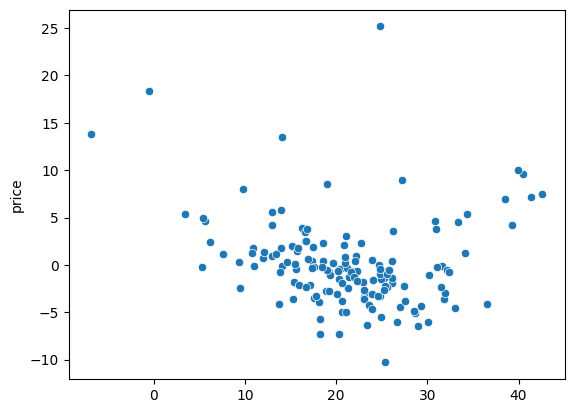

In [37]:
#residuals vs predictions: checking for uniformity
sns.scatterplot(x = y_pred, y = residual)

There is homoscedacity

In [38]:
#performance metrics:
from sklearn.metrics import mean_squared_error

print(f'Root_Mean_squared_error is : {np.sqrt(mean_squared_error(y_pred,y_test))}')

Root_Mean_squared_error is : 4.638689926172821


R_squared and Adjusted R_squared scores:

In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

print(f'R_sqaure score is : {score}')

R_sqaure score is : 0.7112260057484932


In [40]:
#adjusted r2:
adj_score = 1 - ((1-score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R square score : {adj_score}')

Adjusted R square score : 0.6840226584639308


**New Data Prediction**

In [41]:
#getting new set of data:
ndata = boston_data.data[0].reshape(1,-1)

In [42]:
#doing the scaling:
ndata = scaler.transform(ndata)

In [43]:
#predicting:
price = reg.predict(ndata)
print(price)

[30.08649576]


## Model Deployment: Pickle

In [44]:
import pickle

In [45]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [46]:
#loading the model and predictingL
loaded_model = pickle.load(open('regmodel.pkl','rb'))

In [47]:
loaded_model.predict(ndata)

array([30.08649576])